In [502]:
# imports
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt

# Question 1

In [503]:
p1_data = np.genfromtxt('problem_1_data.csv', delimiter=',')
p1_label = np.genfromtxt('problem_1_label.csv', delimiter=',')
print(p1_data.shape)
print(p1_label.shape)

(300,)
(300,)


In [504]:
X = np.column_stack((np.ones_like(p1_data), p1_data, p1_data**2))
X[range(5), :]

array([[1.    , 0.55  , 0.3025],
       [1.    , 0.72  , 0.5184],
       [1.    , 0.6   , 0.36  ],
       [1.    , 0.54  , 0.2916],
       [1.    , 0.42  , 0.1764]])

In [505]:
theta = np.linalg.inv(X.T @ X) @ (X.T @ p1_label)
theta

array([ 4.01338366, -0.58165109,  1.06623954])

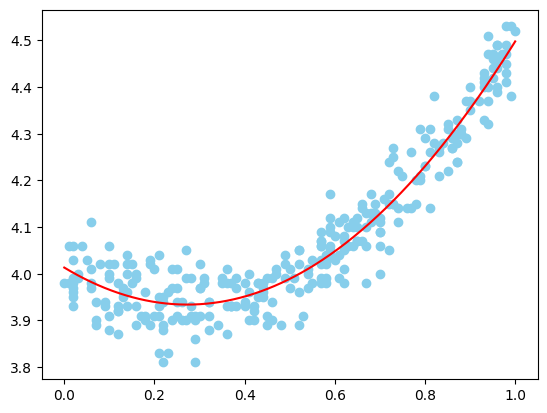

In [506]:
x = np.linspace(0, 1, 400)
y = theta[0] + theta[1] * x + theta[2] * x**2
plt.plot(x, y, color='red')
plt.scatter(p1_data, p1_label, color='skyblue')
plt.show()

# Question 2

In [507]:
p2_data = np.genfromtxt('problem_2_data.csv', delimiter=',')
p2_label = np.genfromtxt('problem_2_label.csv', delimiter=',').reshape(-1, 1)
print(p2_data.shape)
print(p2_label.shape)

(500, 5)
(500, 1)


In [508]:
X_train, X_rest, y_train, y_rest = train_test_split(p2_data, p2_label, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

In [509]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Linear Polynomial

In [510]:
X_train_1 = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_val_1 = np.column_stack((np.ones(X_val.shape[0]), X_val))
X_test_1 = np.column_stack((np.ones(X_test.shape[0]), X_test))

In [511]:
lr = 0.01
epochs = 400
w = np.ones(X_train_1.shape[1]).reshape(-1, 1)

mse_list = []
for i in range(epochs):
    d_f = np.zeros((X_train_1.shape[1], 1))
    for x, y in zip(X_train_1, y_train):
        d_f += ((w.T @ x.reshape(-1, 1)) - y).item() * x.reshape(-1, 1)

    w = w - lr * ((2 / X_train_1.shape[0]) * d_f)
    mse = (1 / X_train_1.shape[0]) * (X_train_1.dot(w) - y_train).T.dot(X_train_1.dot(w) - y_train)
    mse_list.append(mse.item())

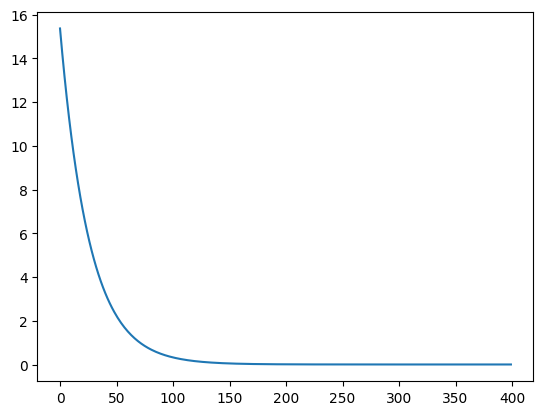

In [512]:
plt.plot(mse_list)
plt.show()

In [513]:
mse_1_train = (1 / X_train_1.shape[0]) * (X_train_1.dot(w) - y_train).T.dot(X_train_1.dot(w) - y_train)
mse_1_val = (1 / X_val_1.shape[0]) * (X_val_1.dot(w) - y_val).T.dot(X_val_1.dot(w) - y_val)
mse_1_test = (1 / X_test_1.shape[0]) * (X_test_1.dot(w) - y_test).T.dot(X_test_1.dot(w) - y_test)
print(mse_1_train)
print(mse_1_val)
print(mse_1_test)

[[0.00233164]]
[[0.00335618]]
[[0.00213276]]


### 2nd Order Polynomial

In [514]:
X_train_2 = np.column_stack((np.ones(X_train.shape[0]), X_train, X_train**2))
X_val_2 = np.column_stack((np.ones(X_val.shape[0]), X_val, X_val**2))
X_test_2 = np.column_stack((np.ones(X_test.shape[0]), X_test, X_test**2))

In [515]:
lr = 0.01
epochs = 400
w = np.ones(X_train_2.shape[1]).reshape(-1, 1)

mse_list = []
for i in range(epochs):
    d_f = np.zeros((X_train_2.shape[1], 1))
    for x, y in zip(X_train_2, y_train):
        d_f += ((w.T @ x.reshape(-1, 1)) - y).item() * x.reshape(-1, 1)

    w = w - lr * ((2 / X_train_2.shape[0]) * d_f)
    mse = (1 / X_train_2.shape[0]) * (X_train_2.dot(w) - y_train).T.dot(X_train_2.dot(w) - y_train)
    mse_list.append(mse.item())

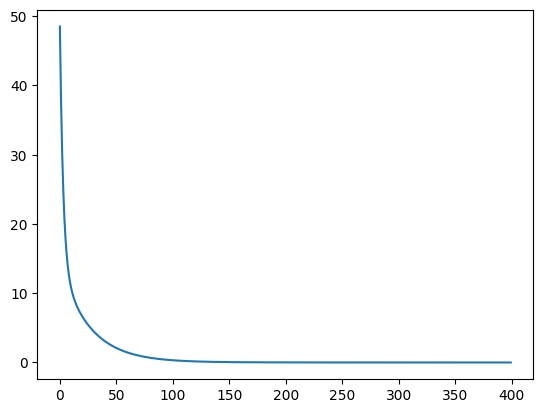

In [516]:
plt.plot(mse_list)
plt.show()

In [517]:
mse_2_train = (1 / X_train_2.shape[0]) * (X_train_2.dot(w) - y_train).T.dot(X_train_2.dot(w) - y_train)
mse_2_val = (1 / X_val_2.shape[0]) * (X_val_2.dot(w) - y_val).T.dot(X_val_2.dot(w) - y_val)
mse_2_test = (1 / X_test_2.shape[0]) * (X_test_2.dot(w) - y_test).T.dot(X_test_2.dot(w) - y_test)
print(mse_2_train)
print(mse_2_val)
print(mse_2_test)

[[0.00280429]]
[[0.00340283]]
[[0.00230865]]


While comparing the validation MSE for each model, the linear polynomial had an MSE of 0.00336 whille the 2nd order polynomial had an MSE of 0.00340. Therefore we choose the linear model to be the better fit.

# Question 3

In [518]:
lunch = np.genfromtxt('lunch_wait_time.csv', delimiter=',')
print(lunch.shape)

(200,)


### Closed Form Solution

In [519]:
theta = lunch.shape[0] / np.sum(lunch).item()
theta

0.9610764055742432

### Gradient Descent

In [520]:
np.zeros((1, 1))

array([[0.]])

In [521]:
lr = 0.001
epochs = 10000
w = 1

mse_list = []
for i in range(epochs):
    w = w - lr * ((-lunch.shape[0] / w) + np.sum(lunch)).item()

In [522]:
print(w)

0.9610764055742433


### population mean, variance, and standard deviation

In [523]:
# mean
sum = 0
for i in lunch:
    sum += i
(sum / len(lunch)).item()

1.0404999999999998

In [524]:
# variance
sum = 0
for i in lunch:
    sum += (i - np.mean(lunch)) ** 2
((1 / len(lunch)) * sum).item()

1.0283297500000004

In [525]:
# standard deviation
sum = 0
for i in lunch:
    sum += (i - np.mean(lunch)) ** 2
(((1 / len(lunch)) * sum)**0.5).item()

1.0140659495318833

## Question 4

In [526]:
A = np.array([[1, 1, 1],
              [4, 2, 1],
              [9, 3, 1],
              [16, 4, 1]])
y = np.array([2, 4, 8, 14]).reshape(-1, 1)

### Gradient Descent

In [527]:
w = np.zeros((A.shape[1], 1))
w

array([[0.],
       [0.],
       [0.]])

In [528]:
lr = 0.001
epochs = 100000
w = np.ones(A.shape[1]).reshape(-1, 1)

for i in range(epochs):
    d_f = np.zeros((A.shape[1], 1))
    for x_i, y_i in zip(A, y):
        d_f += ((w.T @ x_i.reshape(-1, 1)) - y_i).item() * x_i.reshape(-1, 1)

    w = w - lr * ((2 / A.shape[0]) * d_f)

w

array([[ 0.99244683],
       [-0.96011469],
       [ 1.95615849]])

### Closed Form Solution

In [529]:
theta = np.linalg.inv(A.T @ A) @ (A.T @ y)
theta

array([[ 1.],
       [-1.],
       [ 2.]])